In [ ]:
# Importing libraries and required functionalities.
# Required libraries.
import os
import glob
import random
import time
import cv2
import numpy as np
import subprocess
import sys
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
# %matplotlib inline
# Darknet object detector imports.
# %cd ./darknet
# import darknet
# from darknet_images import load_images
# from darknet_images import image_detection

In [ ]:
#!pip install tensorflow
#!pip install tensorflow
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
%cd /content/mydrive/MyDrive/yolov4_object_detection
# Navigating to previous directory or home directory
# Installing dependencies
!pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.1"
!pip install paho-mqtt
!pip install simpy

/content/mydrive/MyDrive/yolov4_object_detection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 393.8 MB 27 kB/s 
     |████████████████████████████████| 394 kB 70.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 334 kB 32.4 MB/s 
     |████████████████████████████████| 2.8 MB 56.2 MB/s 
     |████████████████████████████████| 55.7 MB 63.2 MB/s 
     |████████████████████████████████| 604 kB 69.0 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 399 kB 67.8 MB/s 
     |████████████████████████████████| 204 kB 54.6 MB/s 
     |████████████████████████████████| 2.3 MB 63.4 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149870 sha256=d7e621c4047580abda5c2730fd086c2ea23fd20efbcdb0300e7b

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 6.4 MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62133 sha256=23c156d1e8c01d13ba34bd751ae6e68044cc4aa3db9c4696c9effd4c07951b32
  Stored in directory: /root/.cache/pip/wheels/d0/bf/ac/2b3f43f8c6fcd0f4ba5395397458c521eb0b52d33b574a5a40
Successfully built paho-mqtt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import paho.mqtt.subscribe as subscribe
import paho.mqtt.publish as publish

In [ ]:
from paddleocr import PaddleOCR

/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):


In [ ]:
!nvidia-smi

Thu Aug  4 22:10:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
ocr = PaddleOCR(lang='en',rec_algorithm='CRNN')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3.86M/3.86M [00:05<00:00, 755kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:08<00:00, 1.20MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:03<00:00, 452kiB/s]

[2022/08/04 22:10:50] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

In [ ]:
%cd /content/mydrive/MyDrive/yolov4_object_detection/darknet

/content/mydrive/MyDrive/yolov4_object_detection/darknet


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile

!sed -i 's/GPU=0/GPU=1/' Makefile

!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

!sed -i 's/LIBSO=0/LIBSO=1/' Makefile


!make


chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# !./darknet detector train data/data.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# !./darknet detector train data/data.data cfg/yolov4-obj.cfg /content/mydrive/MyDrive/yolov4_udacity_od/darknet/backup/yolov4-obj_1000.weights -dont_show -map

In [ ]:
import os
%cd /content/mydrive/MyDrive/yolov4_object_detection/obj
allData = []
for filename in os.listdir("validation/"):
    if filename.endswith(".jpg"):
      allData.append(filename)
print(len(allData))

/content/mydrive/.shortcut-targets-by-id/1DghyfRyo3Rdl0lxBwkevsBjKIjJ_5NrX/obj
300


**Testing my code with many images**


In [ ]:
# %cd /content/mydrive/MyDrive/yolov4_udacity_od/darknet
# i = 0
# for image in allData:
#    img_path = "/content/mydrive/MyDrive/yolov4_udacity_od/obj/validation/"+image
#    i = i + 1
#    z = 'output/'+image[:-4]+'.txt'
#    if i > 30 and i < 45:
#       !./darknet detector test data/data.data cfg/yolov4-obj.cfg backup/yolov4-obj_last.weights {img_path} -dont-show -thresh 0.2 -dont_show
#       cv2_imshow('/content/mydrive/MyDrive/yolov4_object_detection/darknet/predictions.jpg')
#       x = input('input to continue')
#    if i > 45:
#      break

**Helping functions**

In [ ]:
def listToString(s): 
    # initialize an empty string
    str1 = "" 
    # traverse in the string  
    for ele in s: 
        str1 += str(ele)  
    # return string  
    return str1 


In [ ]:
def txt_to_rectangle(my_path):
    OldLine = []
    my_x = []
    plates = []
    flag = 0
    with open( my_path, 'r') as reader:
        for line in reader.readlines():
            OldLine.append(line)
        reader.close()
    for i in OldLine[14:]:
        print(i)
        firstword = i[0:5]
        if firstword == 'plate':
            flag = 1
        else:
            continue
        z = i.index('(')
        counter = 0
        word = 1
        for j in i[z:]:
            if j == '1' or j == '2' or j == '3' or j == '4' or j == '5' or j == '6' or j == '7' or j == '8' or j == '9' or j == '-' or j == '0':
                word = 0
                my_x.append(j)
            elif j == ' ' and word == 0:
                word = 1
                print('q')
                saved = int(listToString(my_x))
                plates.append(saved)
                my_x = []
            elif j == ')' and word == 0:
                saved = int(listToString(my_x))
                plates.append(saved)
                word = 1
                flag = 0
                my_x = []
    print(plates)
    return plates


In [ ]:
def cropping_image(text_path, image_path):
    my_plates = txt_to_rectangle(text_path)
    print(my_plates)
    img = cv2.imread(img_path)
    cv2_imshow(img)
    j = 0
    cropped_images = []
    print("plates are : ",len(my_plates))
    for i in range(len(my_plates)):
      if my_plates[i] < 0:
        my_plates[i] = 0
    for i in range(0, len(my_plates), 4):
        x, y, w, h = my_plates[i:i+4]
        print(x, y, w, h)
        cropped = img[ y:y+h, x:w+x]
        cropped_images.append(img[y:y+h, x:w+x])
        cv2_imshow(cropped)
    # if isinstance(cropped, list):
    #   for i in cropped_images:
    #       i = cv2.resize(i, (32, 32))
    #       cv2_imshow(i)
    # else:
    #   i = cv2.resize(cropped, (32, 32))
    #   cv2_imshow(i)
    return cropped_images

In [ ]:
# bubble search algorithm
def sure_percentage_v2(actual, predicted):
  full_mark = len(actual)
  my_mark = 0
  list_actual = list(actual)
  list_predicted = list(predicted)
  for i in list_actual:
    for j in list_predicted:
      if j == i:
        my_mark = my_mark + 1
      else:
        continue
  print("Plate mark : ",float(my_mark / full_mark) * 100)
  return float(my_mark / full_mark) * 100


In [ ]:
def sure_percentage(actual, predicted):
  j = 0
  full_mark = len(actual)
  my_mark = 0
  list_actual = list(actual)
  list_predicted = list(predicted)
  for i in list_actual:
    if  j == len(list_predicted):
      break
    elif list_predicted[j] == i and j < len(list_predicted):
      my_mark = my_mark + 1
      j = j + 1
    else:
      j = j + 1
  print("Plate mark : ",(my_mark / full_mark) * 100)
  return (my_mark / full_mark) * 100


**Testing only one image**

In [ ]:
%cd /content/mydrive/MyDrive/yolov4_object_detection/darknet
!chmod +x ./darknet

/content/mydrive/MyDrive/yolov4_object_detection/darknet


In [ ]:

img_path = "/content/mydrive/MyDrive/yolov4_object_detection/obj/validation/"+allData[73]

!./darknet detector test data/data.data cfg/yolov4-obj.cfg backup/yolov4-obj_last.weights {img_path} -dont-show -thresh 0.15 --save-text  io_folder sample_imgs/ output/ -out output/result.json -ext_output >output/out.txt

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 208 x 128 
  10 conv 

plate: 71%	(left_x:  981   top_y:  359   width:   39   height:   28)

q
q
q
[981, 359, 39, 28]
[981, 359, 39, 28]


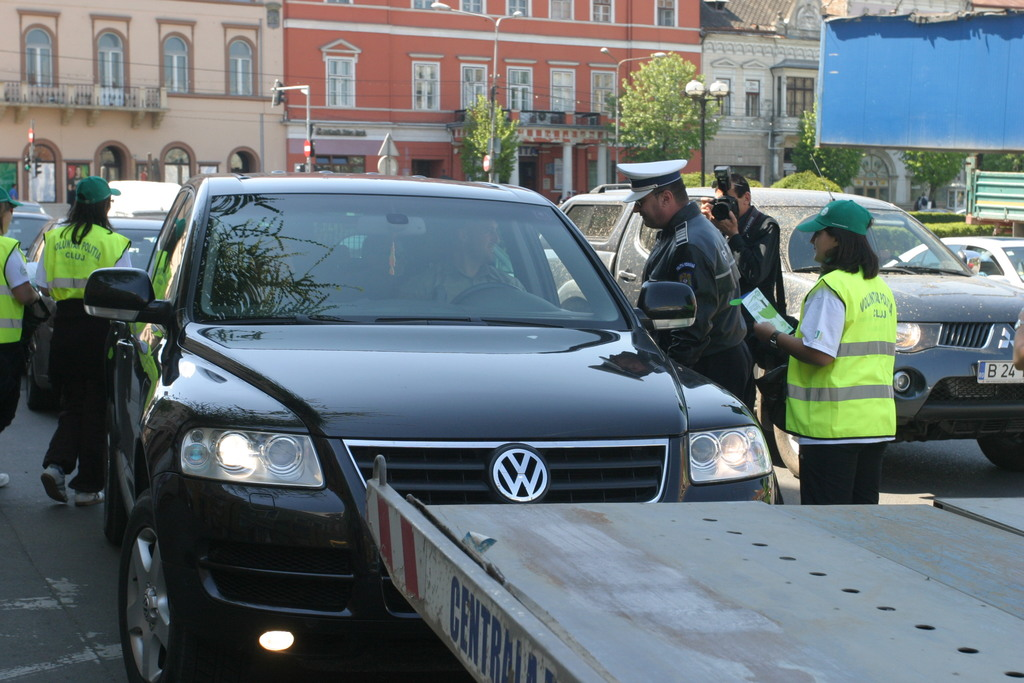

plates are :  4
981 359 39 28


In [ ]:
z = cropping_image(image_path=img_path, text_path='/content/mydrive/MyDrive/yolov4_object_detection/darknet/output/out.txt')

In [ ]:
msg = subscribe.simple("NTI/OUT/CarTracking", hostname="broker.mqttdashboard.com")
print("%s %s" % (msg.topic, msg.payload))

plate_num = (msg.payload).decode("utf-8")

for i in z:
  cv2_imshow(i)
  result = ocr.ocr(i, cls=False, det=False)
  print(result[0][0])
  print(result[0][1])
  print(sure_percentage_v2(plate_num,result[0][0]))
# cv_imshow(z)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-7d28bca60842>", line 1, in <module>
    msg = subscribe.simple("NTI/OUT/CarTracking", hostname="broker.mqttdashboard.com")
  File "/usr/local/lib/python3.7/dist-packages/paho/mqtt/subscribe.py", line 272, in simple
    clean_session, proxy_args)
  File "/usr/local/lib/python3.7/dist-packages/paho/mqtt/subscribe.py", line 183, in callback
    client.loop_forever()
  File "/usr/local/lib/python3.7/dist-packages/paho/mqtt/client.py", line 1756, in loop_forever
    rc = self._loop(timeout)
  File "/usr/local/lib/python3.7/dist-packages/paho/mqtt/client.py", line 1150, in _loop
    socklist = select.select(rlist, wlist, [], timeout)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/li

KeyboardInterrupt: ignored

**Main program embedded with subscribing and publishing**

Waiting for the plate number ... 
NTI/OUT/CarTracking b'B24'
/content/mydrive/MyDrive/yolov4_object_detection/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    20

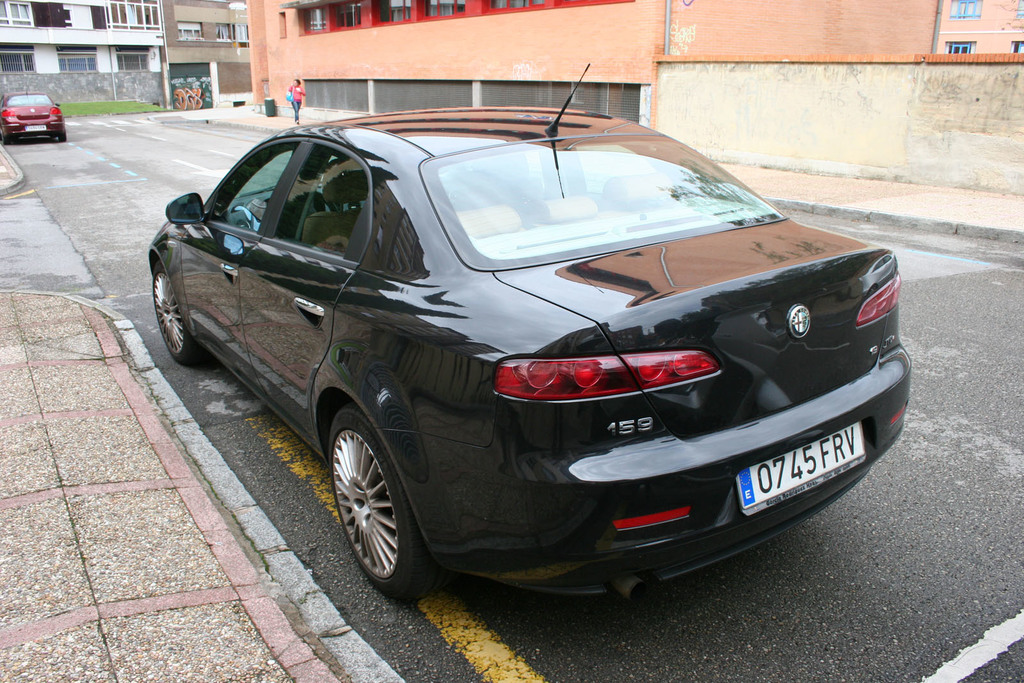

plates are :  4
750 414 119 103


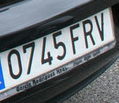

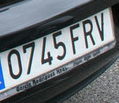

[('07Z3TA', 0.2879747450351715)]
Plate mark :  0.0
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	       

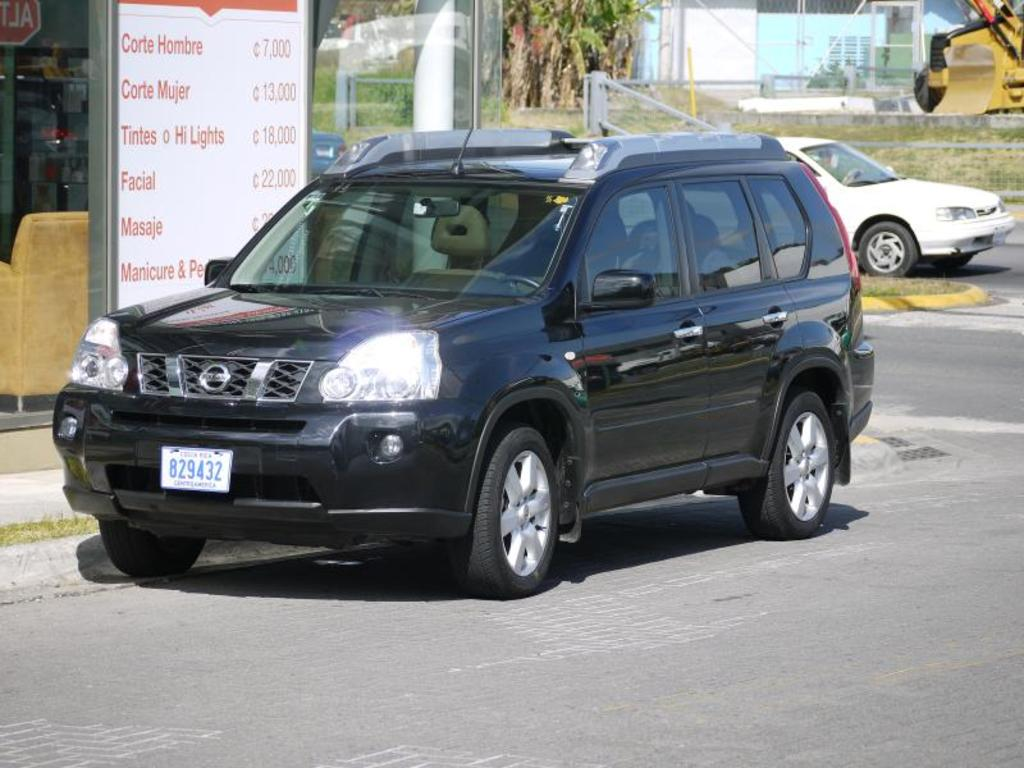

plates are :  4
158 440 74 57


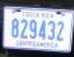

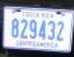

[('[02342', 0.4565201997756958)]
Plate mark :  0.0
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	       

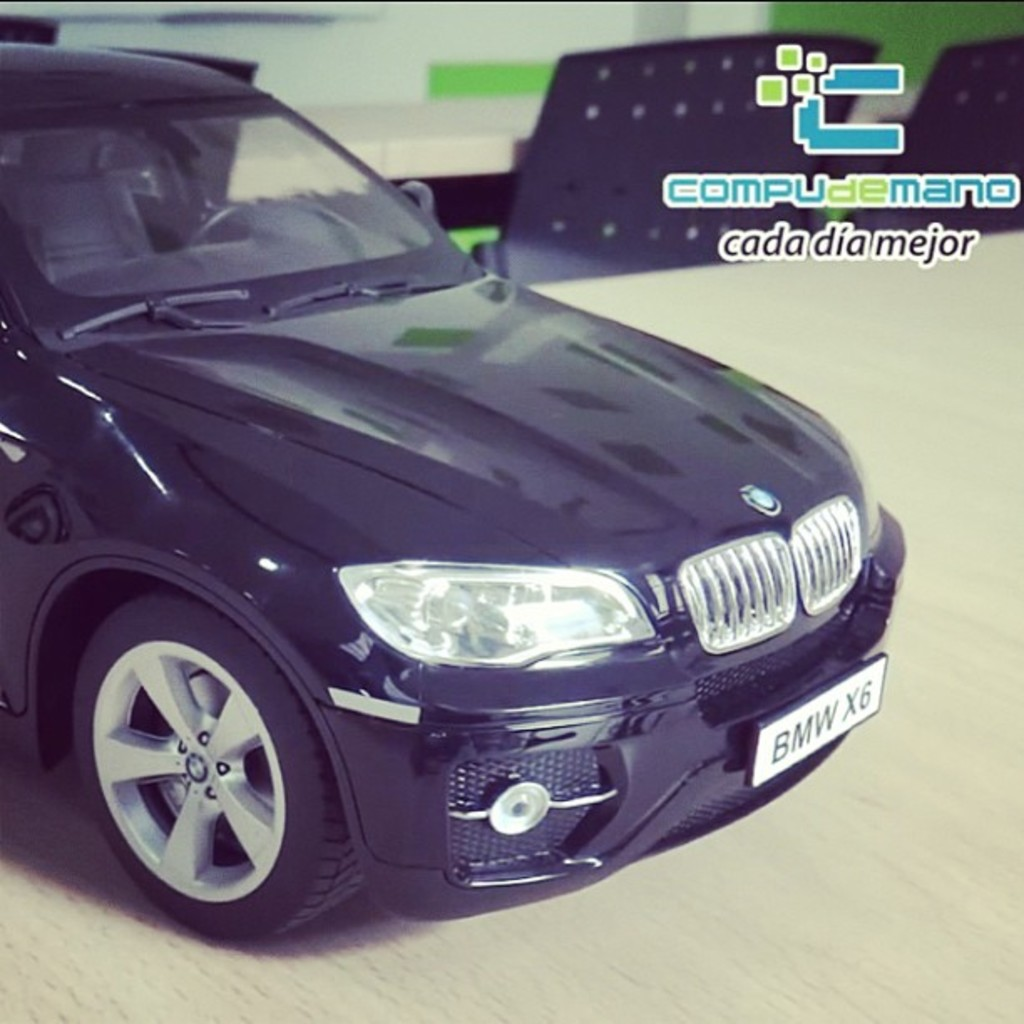

plates are :  8
718 604 189 244


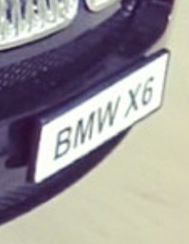

748 662 142 121


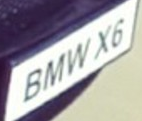

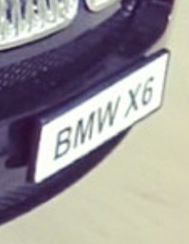

[('B', 0.16698691248893738)]
Plate mark :  33.33333333333333


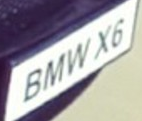

[('BENE', 0.22817552089691162)]
Plate mark :  33.33333333333333
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route 

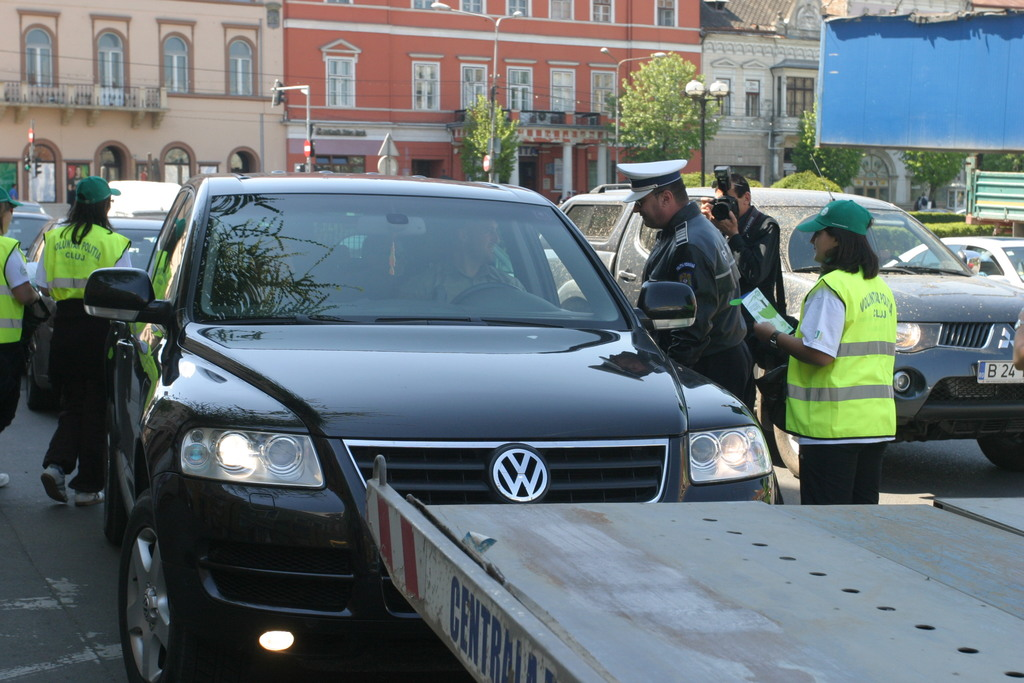

plates are :  4
981 359 39 28


[('B24', 0.9877082705497742)]
Plate mark :  100.0


In [28]:
print("Waiting for the plate number ... ")
flag = 1
plate_num = ''
msg = subscribe.simple("NTI/OUT/CarTracking", hostname="broker.mqttdashboard.com")
print("%s %s" % (msg.topic, msg.payload))

plate_num = (msg.payload).decode("utf-8")


%cd /content/mydrive/MyDrive/yolov4_object_detection/darknet
while flag:
  # Pust your image names here
  for i in allData[70:]:
      img_path = "/content/mydrive/MyDrive/yolov4_object_detection/obj/validation/"+i

      !./darknet detector test data/data.data cfg/yolov4-obj.cfg backup/yolov4-obj_last.weights {img_path} -dont-show -thresh 0.15 --save-text  io_folder sample_imgs/ output/ -out output/result.json -ext_output >output/out.txt
      # Syntax
      z = cropping_image(image_path=img_path, text_path='/content/mydrive/MyDrive/yolov4_object_detection/darknet/output/out.txt')
      for i in z:
        cv2_imshow(i)
        result = ocr.ocr(i, cls=False, det=False)
        print(result)
        percentage = sure_percentage(plate_num, result[0][0])
        if percentage > 50:
          flag = 0
          break
      if flag == 0:
        break

publish.single("NTI/in/CarTracking/response" , "0 Plate Detected, we are : {} % accurate, at location ...  ".format(percentage) , hostname="broker.mqttdashboard.com")